In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import count

In [2]:
# https://www.kaggle.com/andrewlucci/huawei-social-network-data
df = pd.read_excel("Facebook_Data.xlsx", header=None) 
df = df.drop(0, axis=1).drop(0, axis=0) # Drop first column and first row (contain names)
df = df.reset_index(drop=True)
df.columns = range(df.shape[1])
df = df.astype(int)
g = nx.from_pandas_adjacency(df, nx.DiGraph)

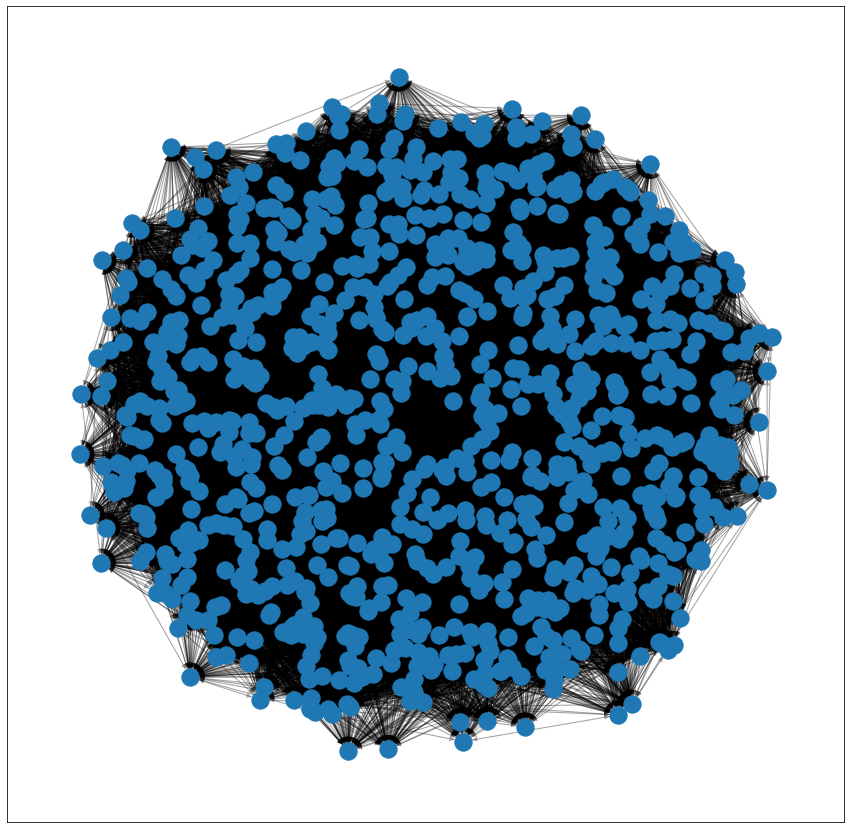

In [3]:
fig = plt.figure(figsize=(15, 15))
layout = nx.spring_layout(g)
nx.draw_networkx_edges(g, layout, alpha=0.2)
nx.draw_networkx_nodes(g, layout, nodesize=300)
# plt.savefig("graph.png")

In [4]:
deg_cen = nx.degree_centrality(g)
nx.set_node_attributes(g, deg_cen, "degree_centrality")

bet_cen = nx.betweenness_centrality(g)
nx.set_node_attributes(g, bet_cen, "betweenness_centrality")

closeness_cen = nx.closeness_centrality(g)
nx.set_node_attributes(g, closeness_cen, "closeness_centrality")

katz_cen = nx.katz_centrality_numpy(g)
nx.set_node_attributes(g, katz_cen, "katz_centrality")

In [5]:
def draw_nx_graph_with_attribute(graph, attribute, suptitle=None, layout=None, fig=None, nodesize=100, edge_alpha=0.2, filename=None):
    """
    Draw a NetworkX Graph with colormap of an attribute
    
    Args:
        graph:        NetworkX Graph
        attribute:    name of the attribute
        suptitle:     suptitle of the figure
        layout:       layout of the graph
        fig:          matplotlib figure
        nodesize:     size of nodes
        edge_alpha:   alpha value of the edges
        filename:     name of the file to save the figure
    """
    att = nx.get_node_attributes(graph, attribute) # get attribute
    nodes = graph.nodes()
    colors = [att[n] for n in nodes]               # get color for each node

    if not layout:
        layout = nx.spring_layout(graph)
    
    if not fig:
        fig = plt.figure(figsize=(20, 15))
        
    if suptitle:
        fig.suptitle(suptitle)
        
    edge_col = nx.draw_networkx_edges(graph, layout, fig=fig, alpha=edge_alpha)
    node_col = nx.draw_networkx_nodes(graph, layout, fig=fig, nodelist=nodes, node_color=colors, 
                                node_size=nodesize, cmap=plt.cm.jet)
    fig.colorbar(node_col)
    plt.axis('off')
    
    if filename:
        plt.savefig(filename)

In [6]:
def att_total(graph, attribute_name):
    """
    Compute cumulative value of the node attribute
    
    Args:
        graph:           NetworkX Graph
        attributes_name: name of the attribute
    Returns:
        result:          cumulative value of the node attribute
    """
    att = nx.get_node_attributes(graph, attribute_name) # get attribute
    
    res = 0
    for i in att:
        res += att[i]
    return res

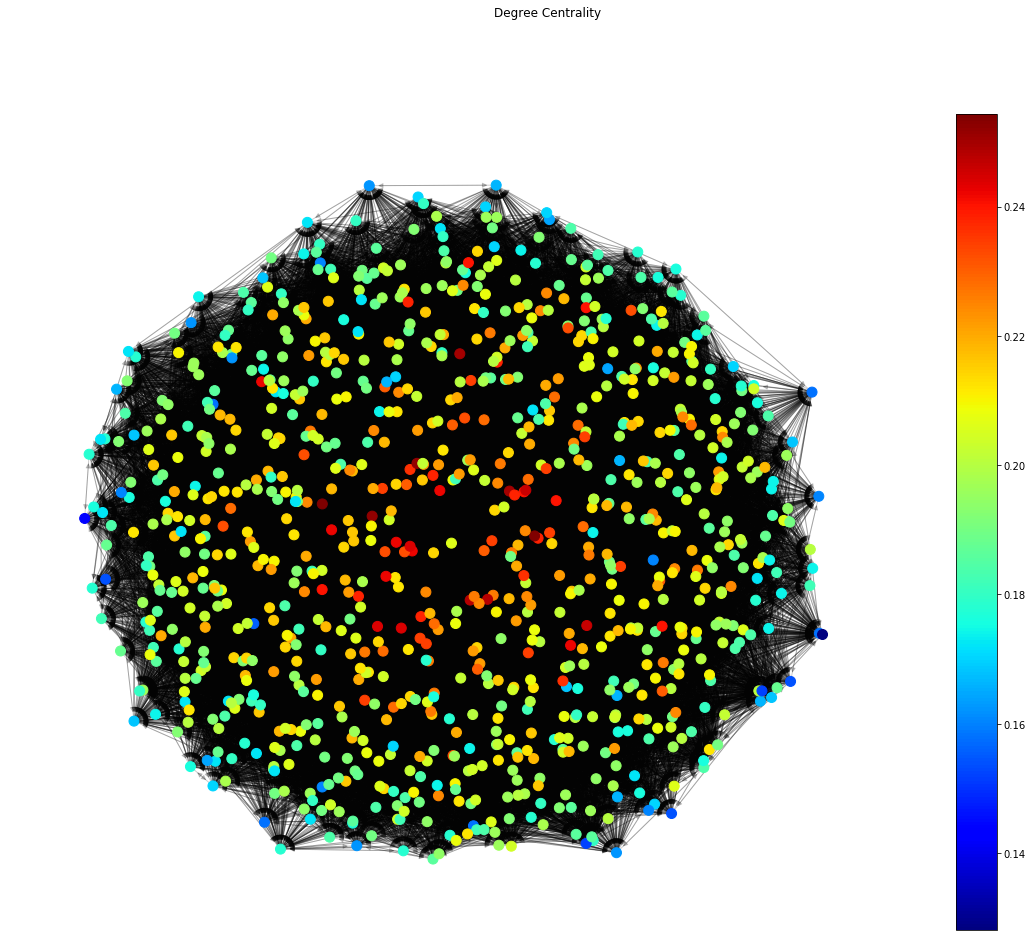

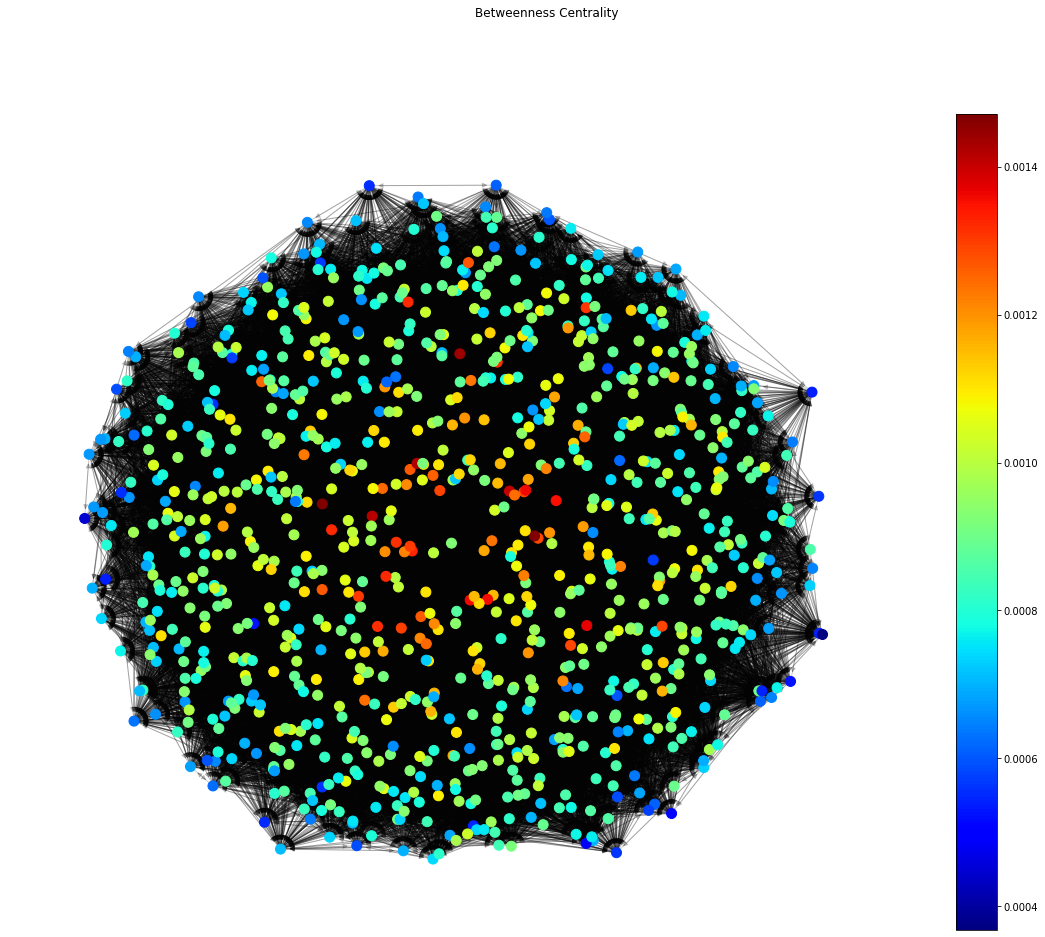

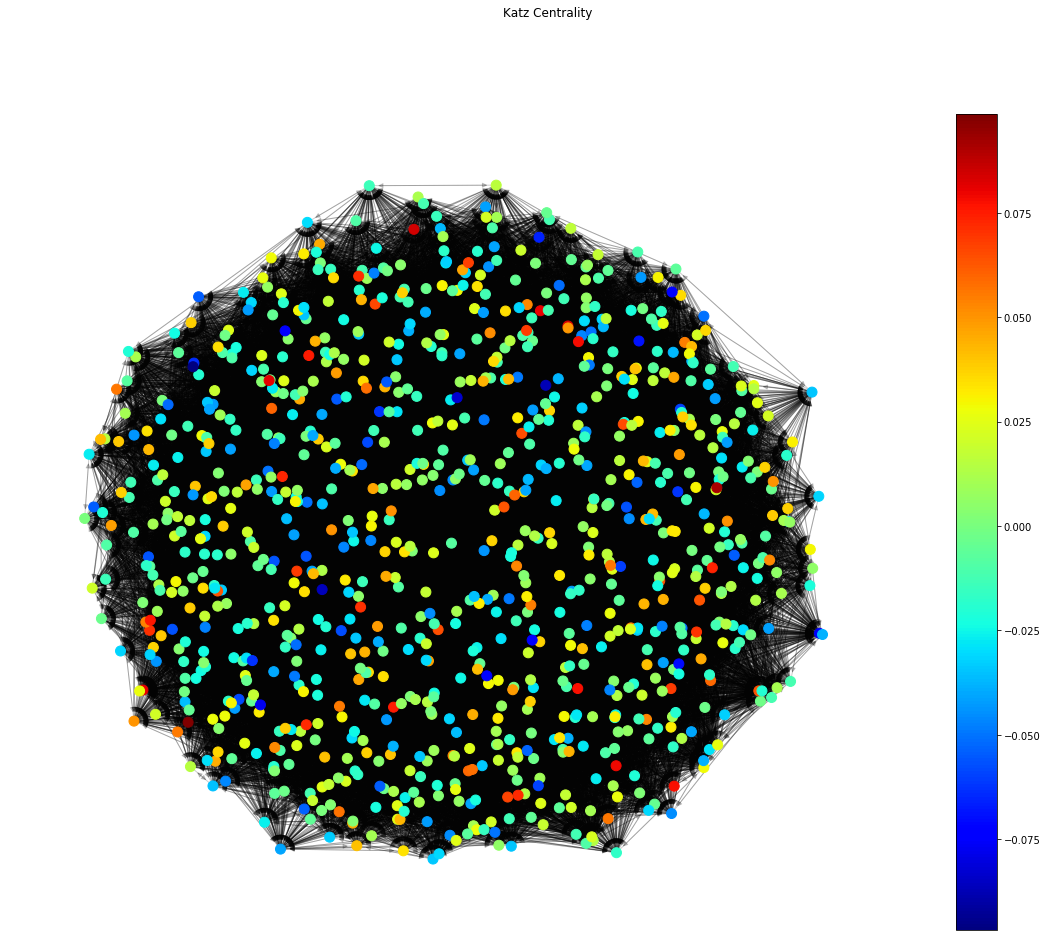

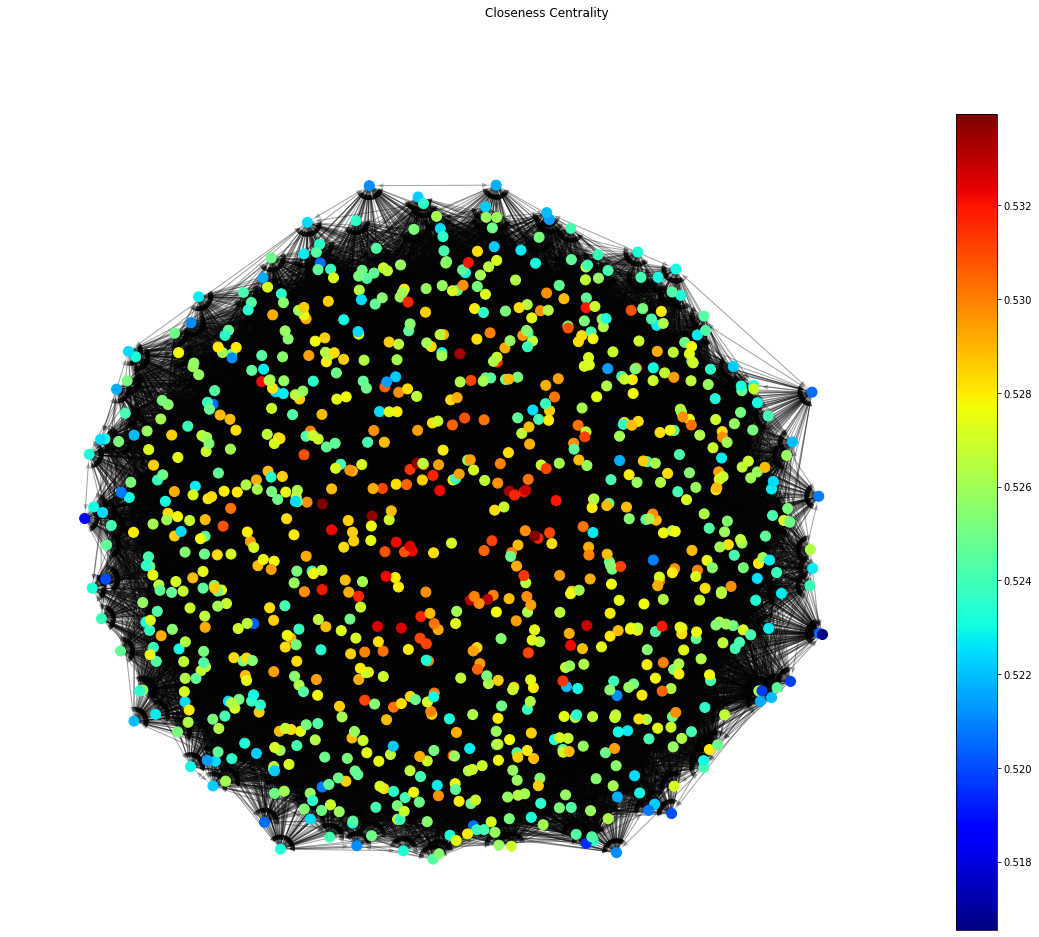

In [7]:
attributes = [["degree_centrality", "Degree Centrality"], \
              ["betweenness_centrality", "Betweenness Centrality"], \
              ["katz_centrality", "Katz Centrality"], \
              ["closeness_centrality", "Closeness Centrality"]]

# create layout before calling function to have nodes in the same place for all drawings
layout = nx.spring_layout(g) 
for att, title in attributes:
    draw_nx_graph_with_attribute(g, att, suptitle=title, layout=layout)#, filename=f"{att}_full.png")

In [8]:
print(f"Network density                      : {nx.density(g)}")
print(f"Network diameter                     : {nx.diameter(g)}")
print(f"Network average shortest path length : {nx.average_shortest_path_length(g)}")
for att, att_name in attributes:
    print(f"{att_name:37s}: {att_total(g, att)}")

Network density                      : 0.10040640640640641
Network diameter                     : 3
Network average shortest path length : 1.8996316316316317
Degree Centrality                    : 200.81281281281332
Betweenness Centrality               : 0.9014345006328971
Katz Centrality                      : 0.33590268443302657
Closeness Centrality                 : 526.4307575652645


In [9]:
def first_n_percent(graph, attribute_name, percent, reverse=True):
    """
    List of nodes representing first n percents of the attribute
    
    Args:
        graph:           NetworkX Graph
        attribute_name:  name of the attribute
        percent:         float value [0, 1]
        reverse:         bool representing whether to reverse sorting or not
    Returns:
        att_keys_sorted: list of nodes 
    """
    att = nx.get_node_attributes(graph, attribute_name) # get attribute
    att_keys_sorted = sorted(att, key=bet_cen.get, reverse=reverse)
    
    att_total_val = att_total(graph, attribute_name)
        
    att_total_cur = 0
    for i in range(len(att_keys_sorted)):
        if att_total_cur >= percent * att_total_val:
            break
        att_total_cur += att[att_keys_sorted[i]]
    
    return att_keys_sorted[:i]

## Betweenness Centrality

In [10]:
bet_cen_sorted = first_n_percent(g, "betweenness_centrality", 0.9)

In [11]:
print(f"Removing {len(bet_cen_sorted)} elements from the graph")

Removing 861 elements from the graph


In [12]:
g_bet = g.copy()
g_bet.remove_nodes_from(bet_cen_sorted)

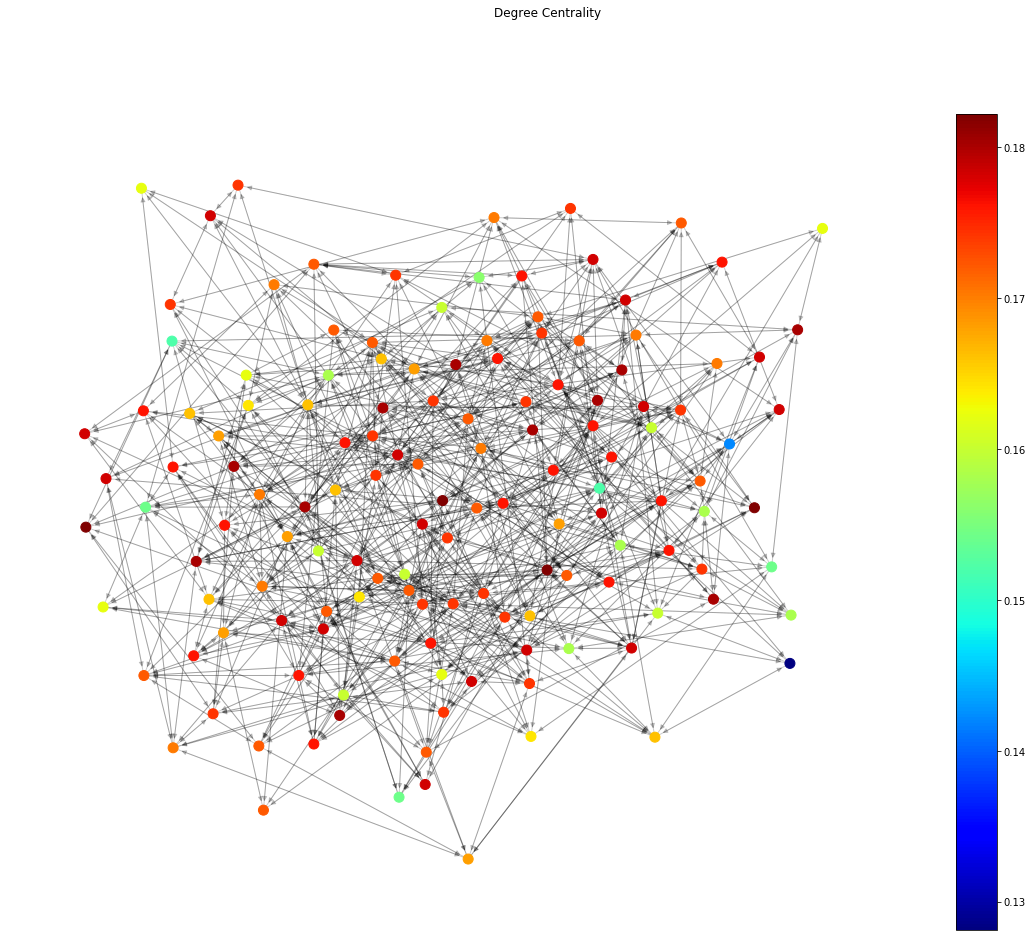

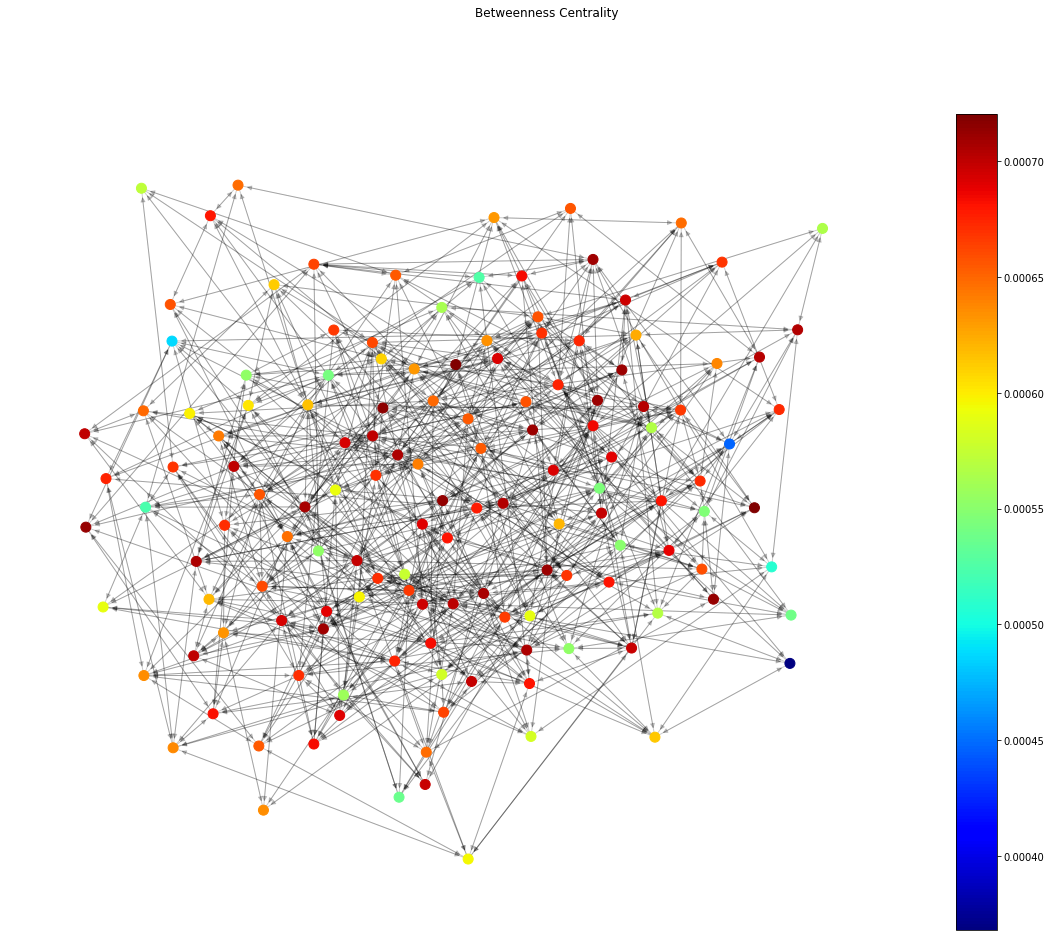

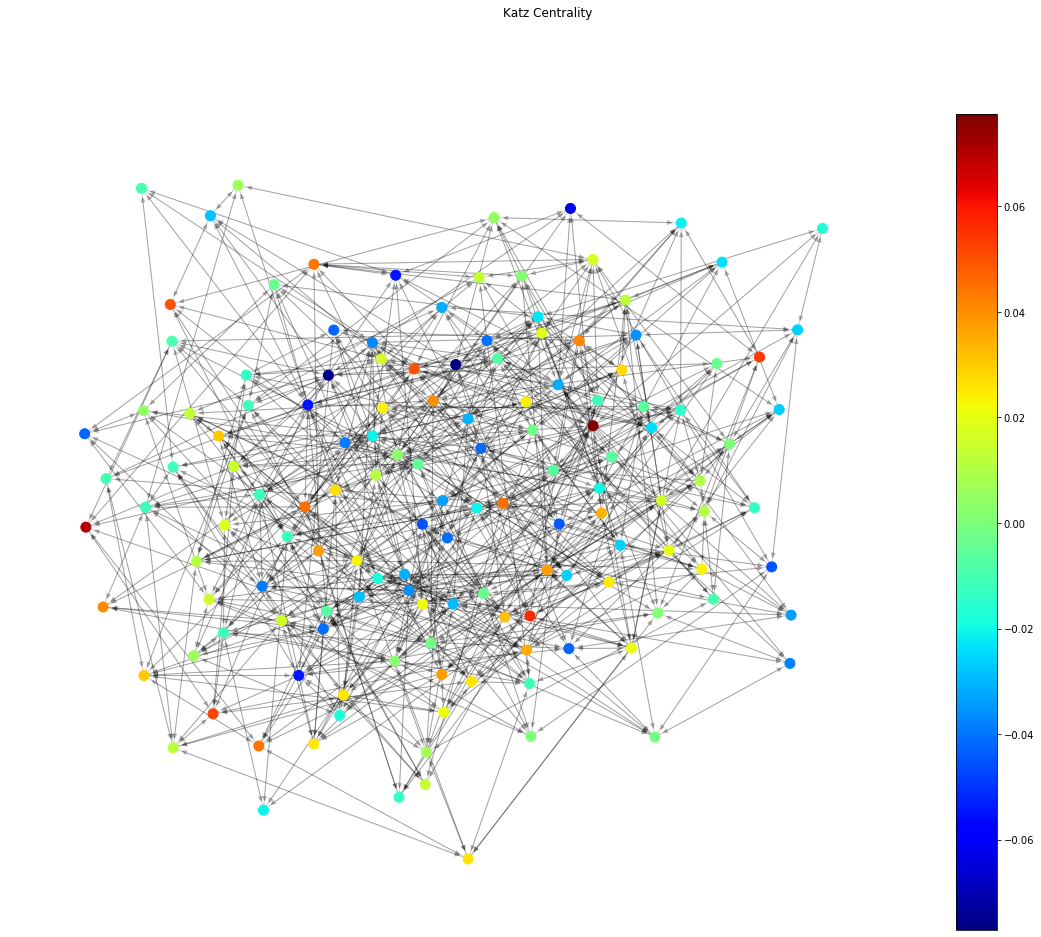

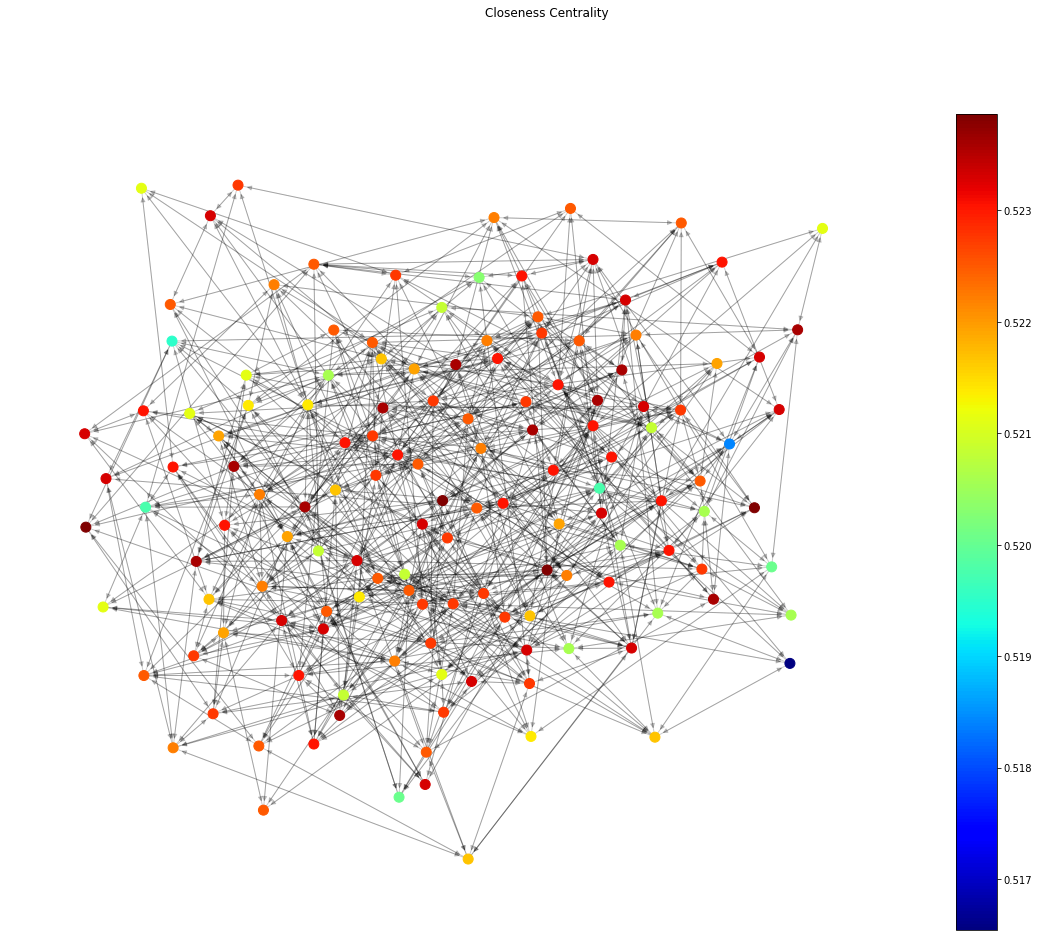

In [13]:
# create layout before calling function to have nodes in the same place for all drawings
layout = nx.spring_layout(g_bet) 
for att, title in attributes:
    draw_nx_graph_with_attribute(g_bet, att, suptitle=title, layout=layout)#, filename=f"{att}_bet.png")

In [14]:
print(f"Network density                      : {nx.density(g_bet)}")
print(f"Network diameter                     : {nx.diameter(g_bet)}")
print(f"Network average shortest path length : {nx.average_shortest_path_length(g_bet)}")
for att, att_name in attributes:
    print(f"{att_name:37s}: {att_total(g_bet, att)}")

Network density                      : 0.07215097487227609
Network diameter                     : 4
Network average shortest path length : 2.3854655406109893
Degree Centrality                    : 23.79779779779778
Betweenness Centrality               : 0.08994040796565708
Katz Centrality                      : -0.2534487121017022
Closeness Centrality                 : 72.6040011202925


## Degree Centrality

In [15]:
deg_cen_sorted = first_n_percent(g, "degree_centrality", 0.9)

In [16]:
print(f"Removing {len(deg_cen_sorted)} elements from the graph")

Removing 882 elements from the graph


In [17]:
g_deg = g.copy()
g_deg.remove_nodes_from(deg_cen_sorted)

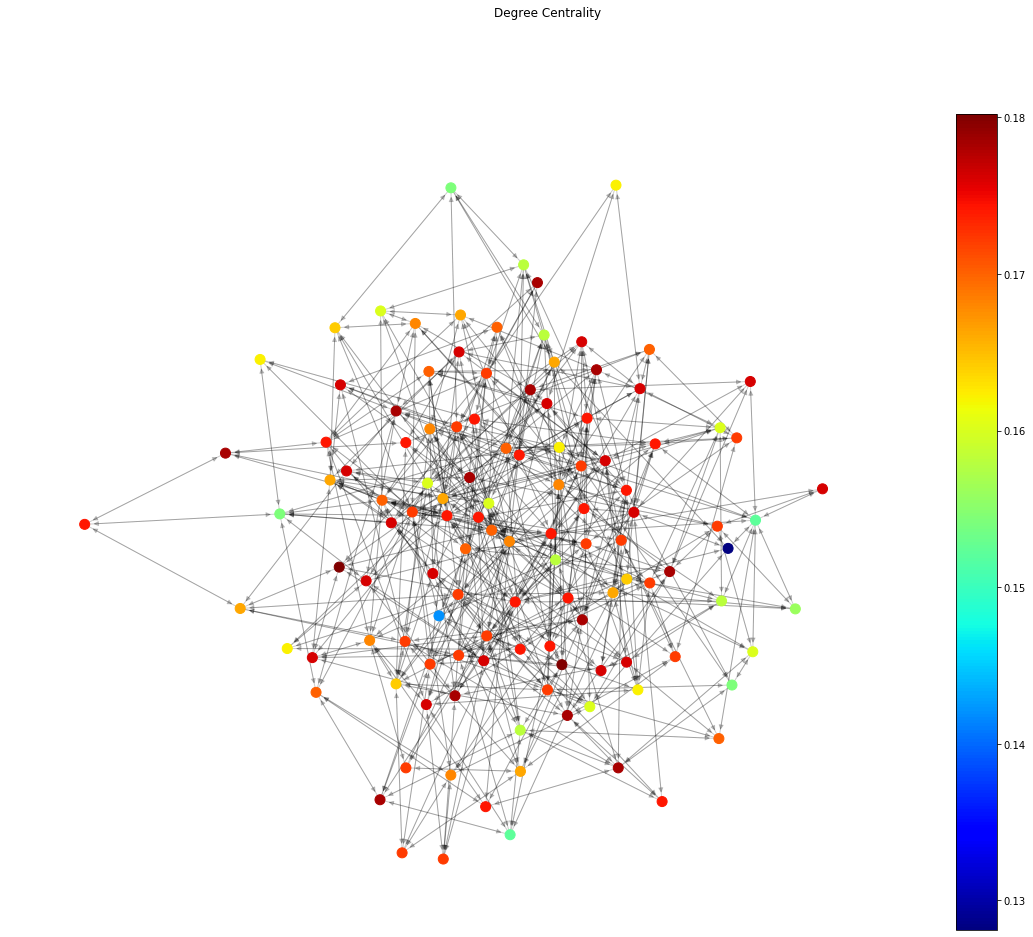

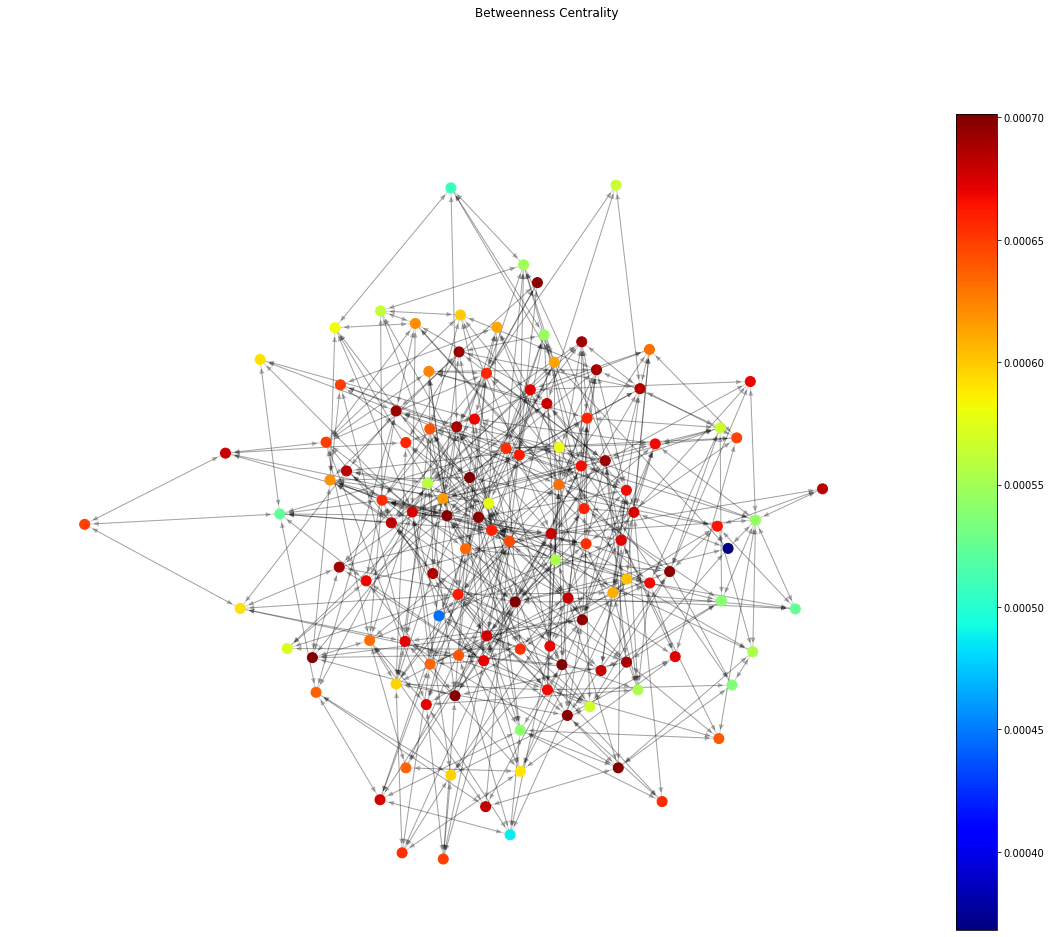

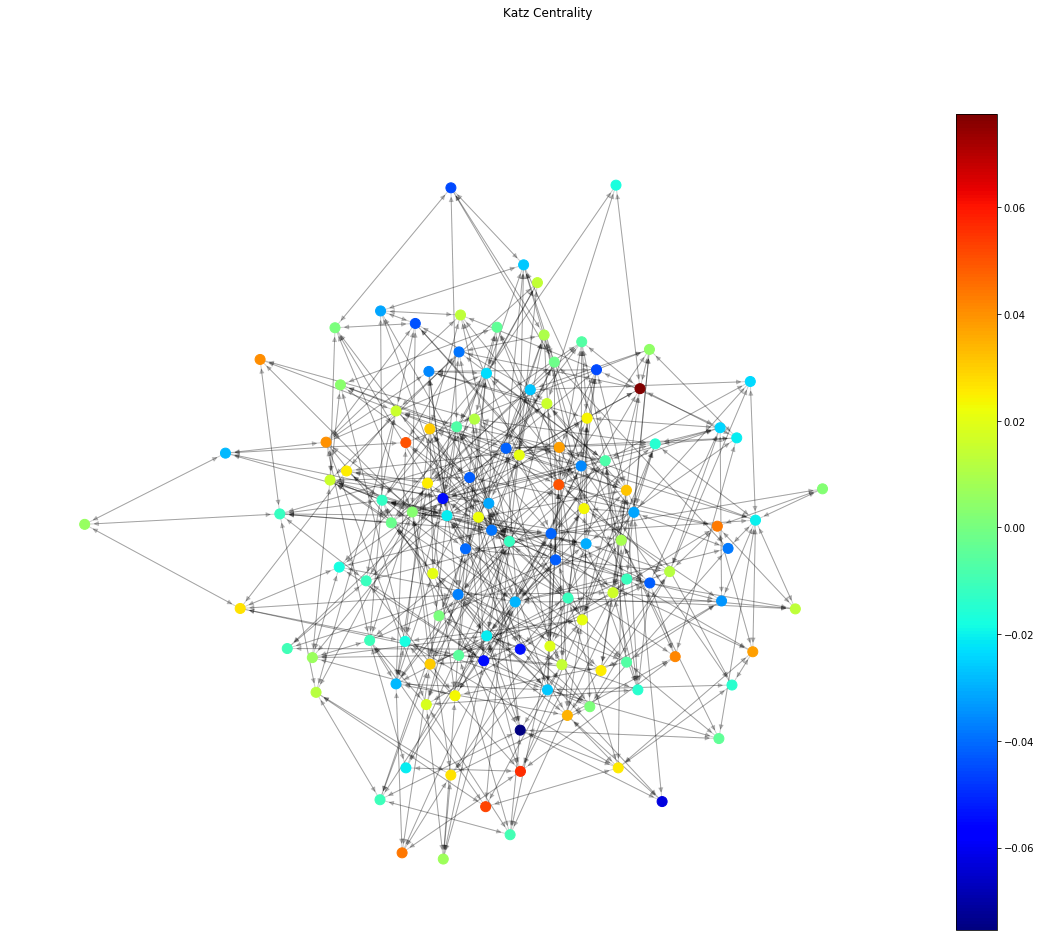

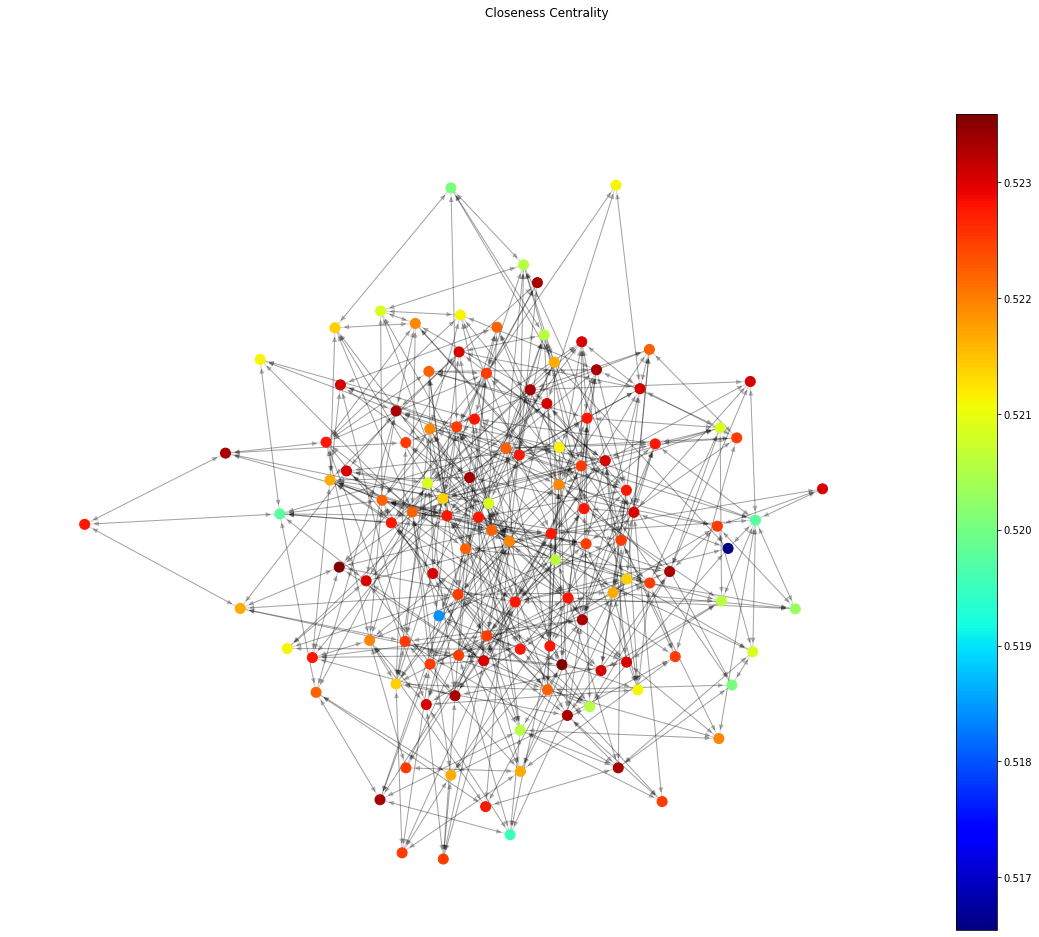

In [18]:
# create layout before calling function to have nodes in the same place for all drawings
layout = nx.spring_layout(g_deg) 
for att, title in attributes:
    draw_nx_graph_with_attribute(g_deg, att, suptitle=title, layout=layout)#, filename=f"{att}_deg.png")

In [19]:
print(f"Network density                      : {nx.density(g_deg)}")
print(f"Network diameter                     : {nx.diameter(g_deg)}")
print(f"Network average shortest path length : {nx.average_shortest_path_length(g_deg)}")
for att, att_name in attributes:
    print(f"{att_name:37s}: {att_total(g_deg, att)}")

Network density                      : 0.07083876575402
Network diameter                     : 4
Network average shortest path length : 2.465015210777923
Degree Centrality                    : 20.02802802802801
Betweenness Centrality               : 0.07503432995610027
Katz Centrality                      : -0.40240129481645087
Closeness Centrality                 : 61.61090968987296


## Closeness Centrality

In [20]:
cl_cen_sorted = first_n_percent(g, "closeness_centrality", 0.9)

In [21]:
print(f"Removing {len(deg_cen_sorted)} elements from the graph")

Removing 882 elements from the graph


In [22]:
g_cl = g.copy()
g_cl.remove_nodes_from(cl_cen_sorted)

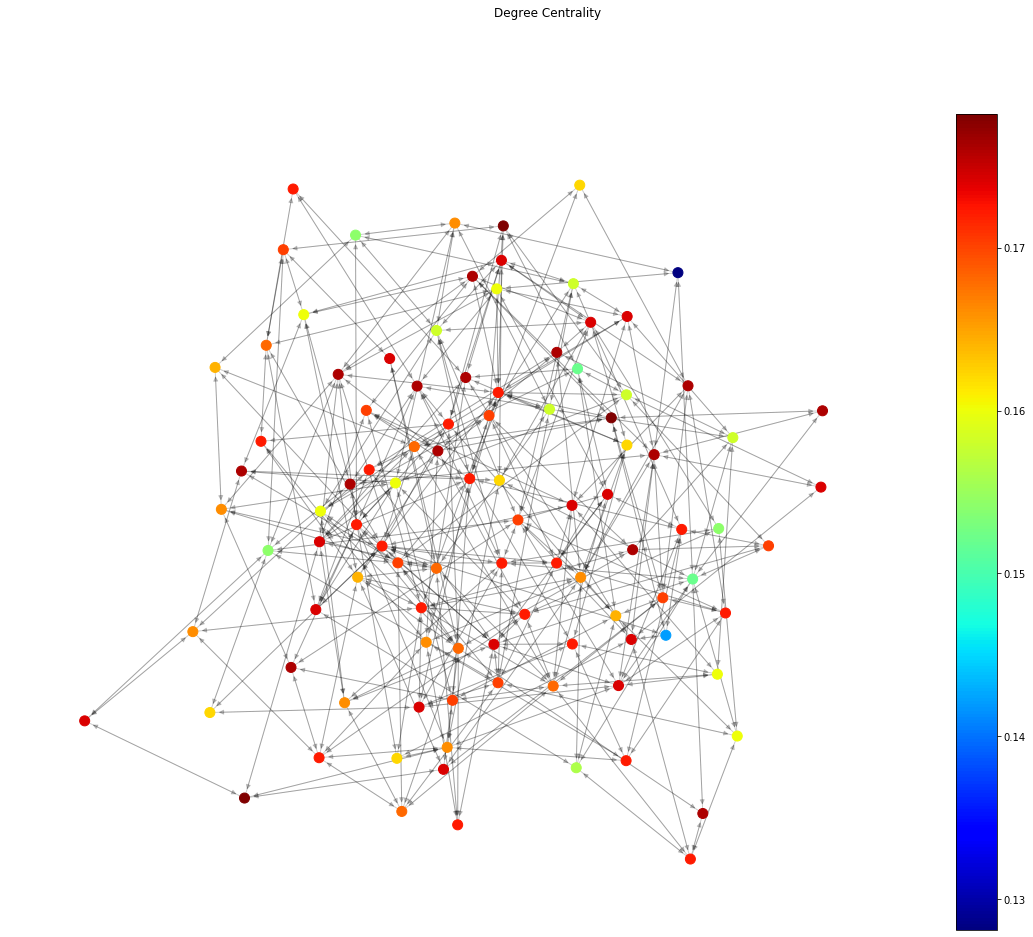

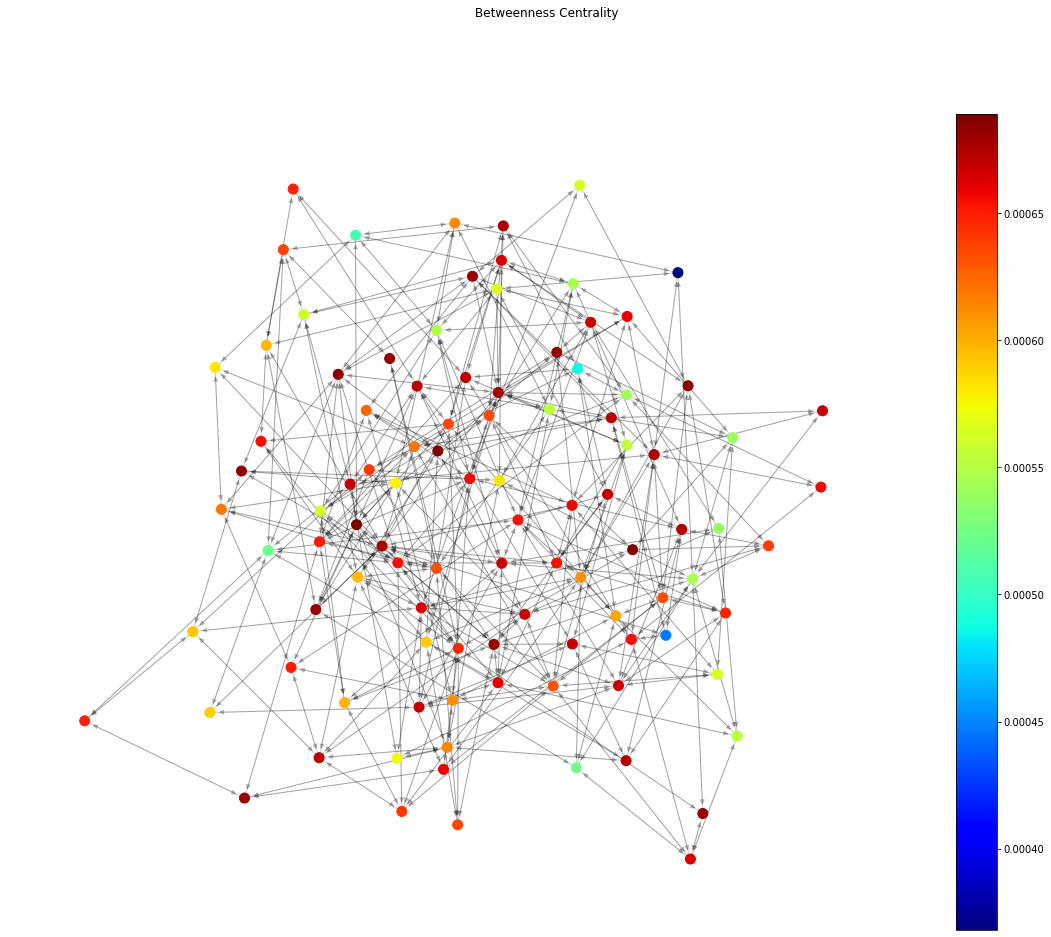

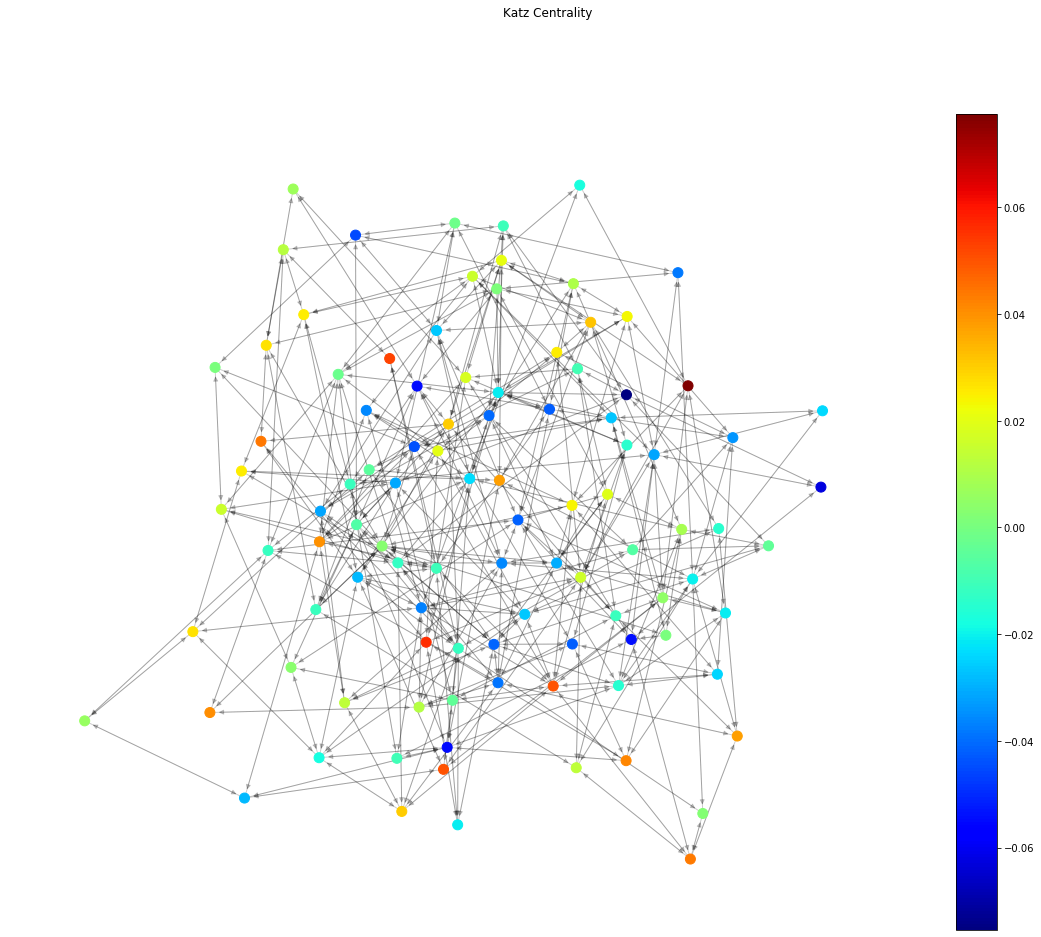

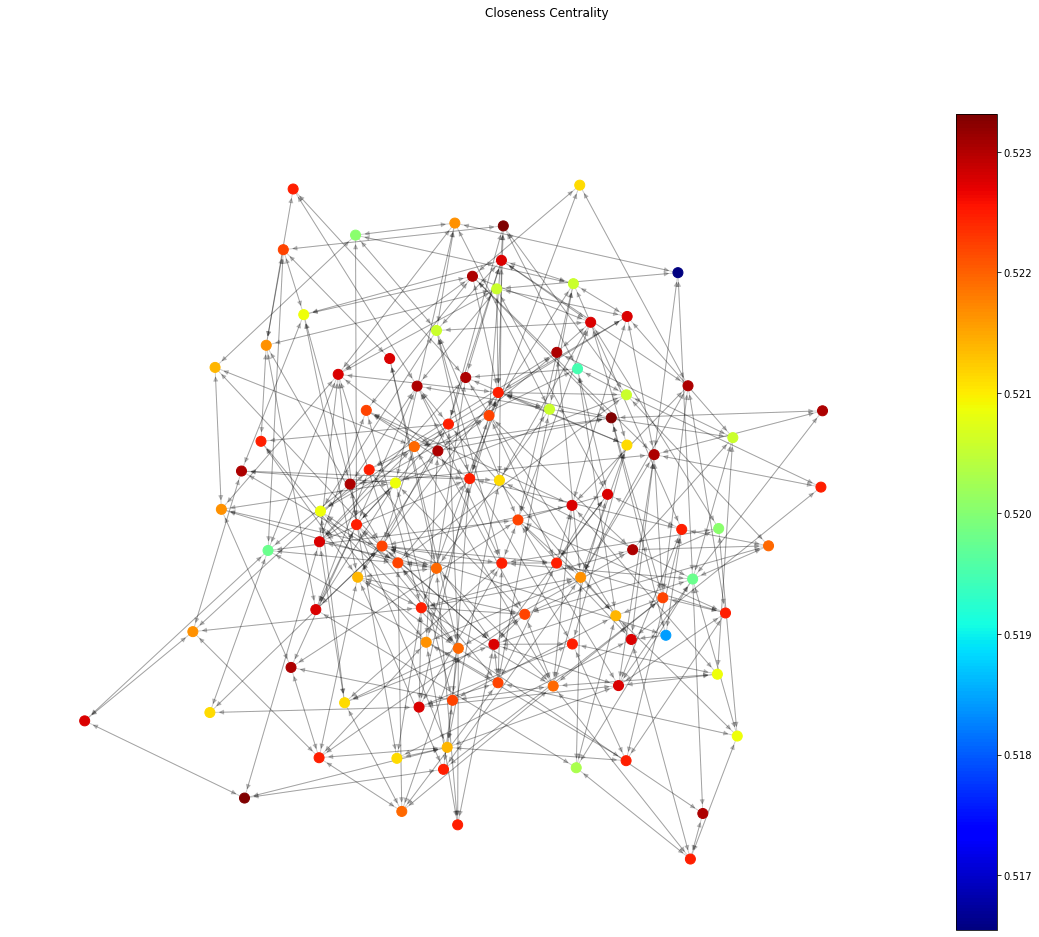

In [23]:
# create layout before calling function to have nodes in the same place for all drawings
layout = nx.spring_layout(g_cl) 
for att, title in attributes:
    draw_nx_graph_with_attribute(g_cl, att, suptitle=title, layout=layout)#, filename=f"{att}_cl.png")

In [24]:
print(f"Network density                      : {nx.density(g_cl)}")
print(f"Network diameter                     : {nx.diameter(g_cl)}")
print(f"Network average shortest path length : {nx.average_shortest_path_length(g_cl)}")
for att, att_name in attributes:
    print(f"{att_name:37s}: {att_total(g_cl, att)}")

Network density                      : 0.06808080808080808
Network diameter                     : 4
Network average shortest path length : 2.582626262626263
Degree Centrality                    : 16.836836836836824
Betweenness Centrality               : 0.06249964234749231
Katz Centrality                      : -0.38315455690879247
Closeness Centrality                 : 52.19378242101336


## Katz Centrality

In [25]:
katz_cen_sorted = first_n_percent(g, "katz_centrality", 0.9)

In [26]:
print(f"Removing {len(katz_cen_sorted)} elements from the graph")

Removing 80 elements from the graph


In [27]:
g_katz = g.copy()
g_katz.remove_nodes_from(katz_cen_sorted)

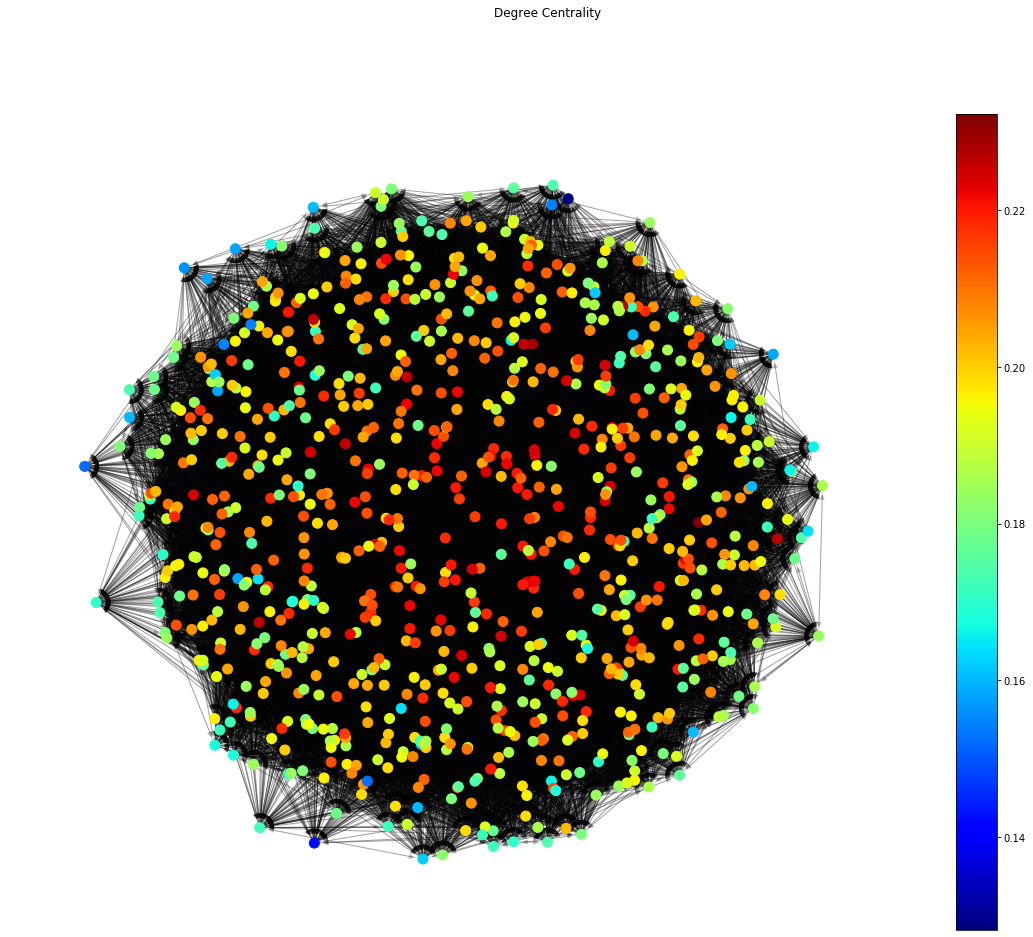

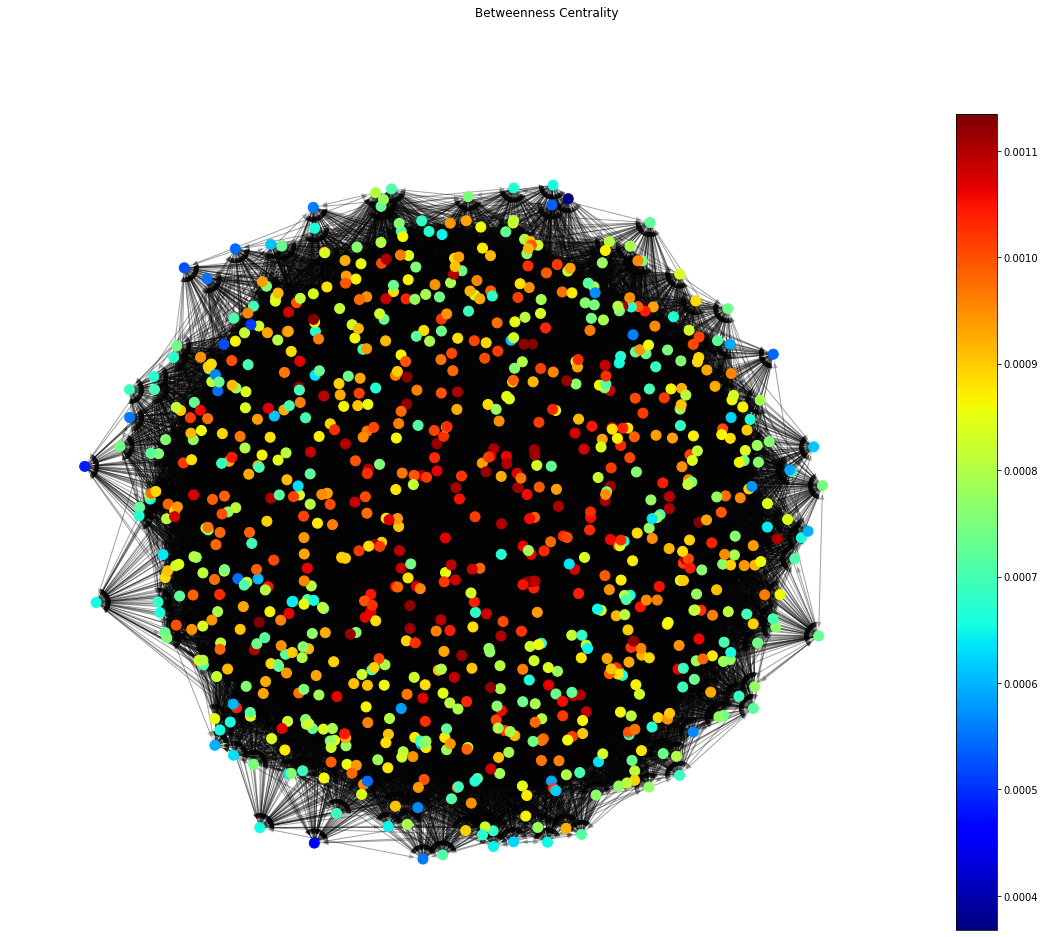

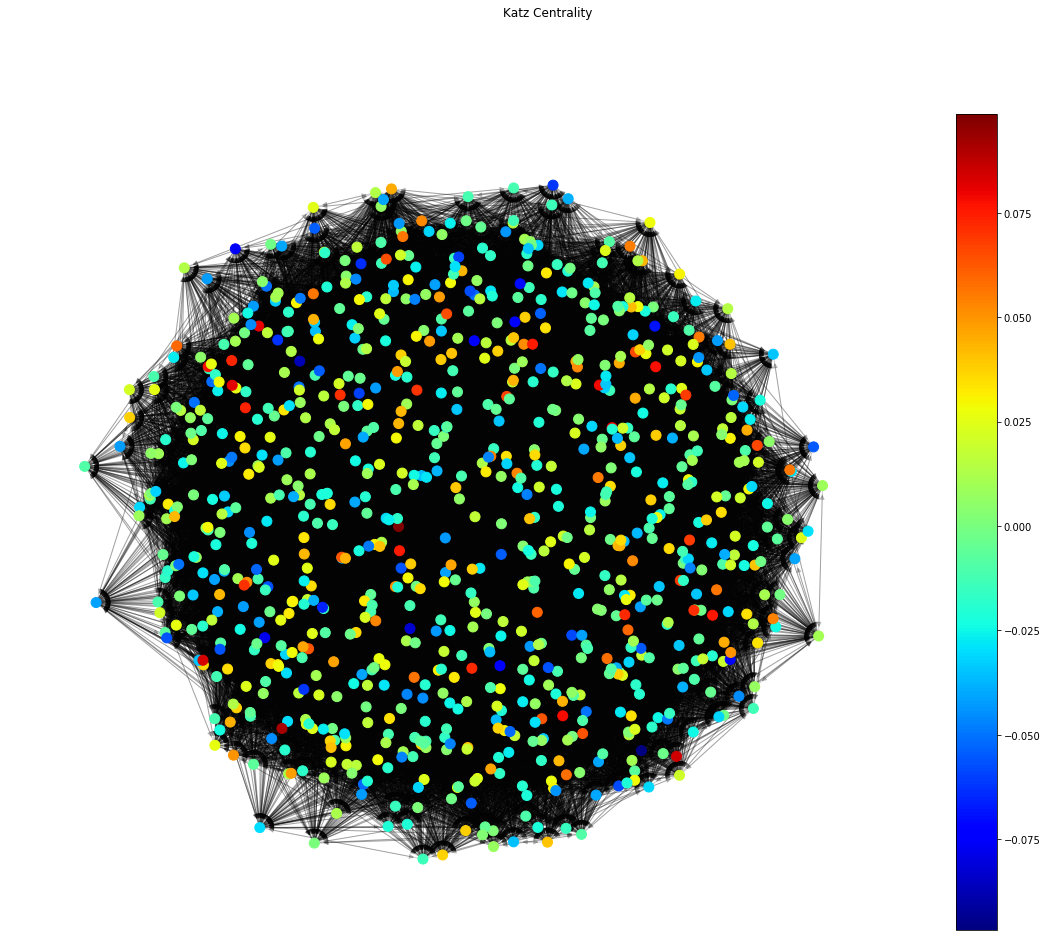

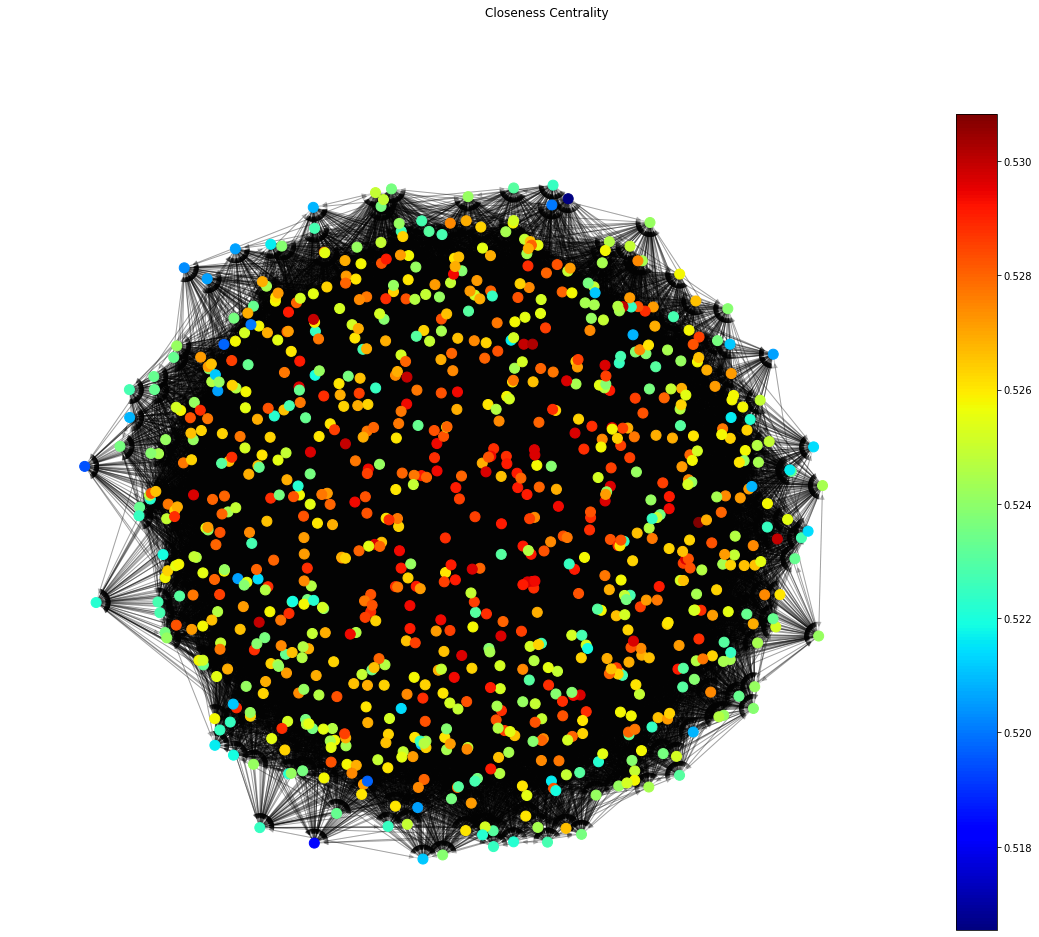

In [28]:
# create layout before calling function to have nodes in the same place for all drawings
layout = nx.spring_layout(g_katz) 
for att, title in attributes:
    draw_nx_graph_with_attribute(g_katz, att, suptitle=title, layout=layout)#, filename=f"{att}_katz.png")

In [29]:
print(f"Network density                      : {nx.density(g_katz)}")
print(f"Network diameter                     : {nx.diameter(g_katz)}")
print(f"Network average shortest path length : {nx.average_shortest_path_length(g_katz)}")
for att, att_name in attributes:
    print(f"{att_name:37s}: {att_total(g_katz, att)}")

Network density                      : 0.09726072763400671
Network diameter                     : 3
Network average shortest path length : 1.902893031177556
Degree Centrality                    : 181.94594594594633
Betweenness Centrality               : 0.8016621760713853
Katz Centrality                      : 0.01986333451743967
Closeness Centrality                 : 483.924458425492
